In [2]:
import pandas as pd
data = pd.read_csv('train.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

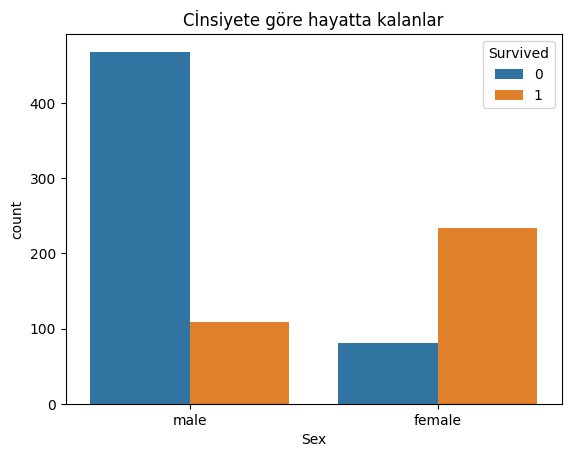

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x='Sex',hue='Survived',data=data)
plt.title('Cİnsiyete göre hayatta kalanlar')
plt.show()

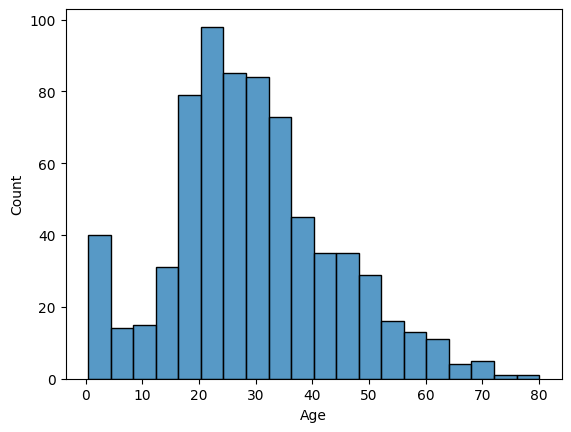

In [8]:
sns.histplot(data=data,x='Age')
plt.show()

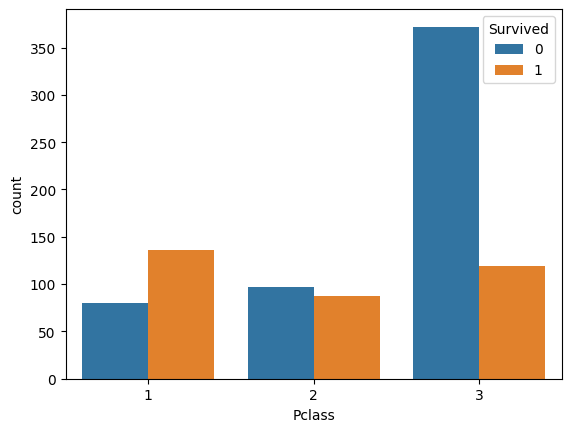

In [9]:
sns.countplot(x='Pclass',hue='Survived',data=data)
plt.show()

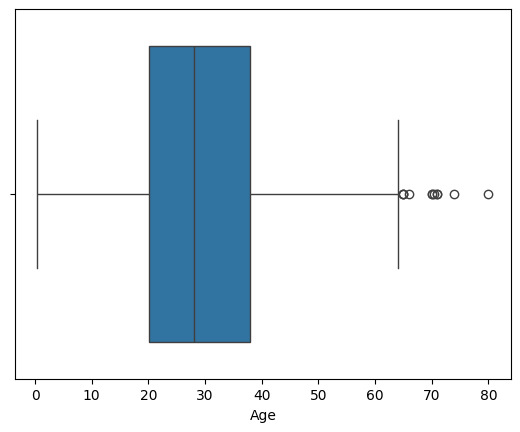

In [10]:
sns.boxplot(x='Age',data=data)
plt.show()

In [11]:
data['Age'].mean()

np.float64(29.69911764705882)

In [12]:
data['Age'].median()

np.float64(28.0)

/tmp/ipykernel_10271/680815050.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(),inplace=True)


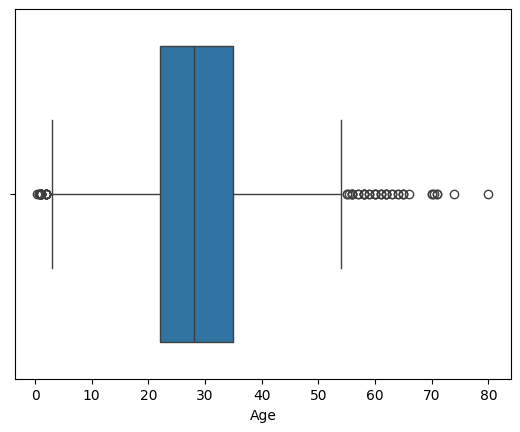

In [13]:
data['Age'].fillna(data['Age'].median(),inplace=True)
sns.boxplot(x='Age',data=data)
plt.show()

In [14]:
data['Age'].isnull().sum()

np.int64(0)

In [15]:
data['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
q1 = data['Age'].quantile(0.25)
q3 = data['Age'].quantile(0.75)
print(f'Q1: {q1}')
print(f'Q3: {q3}')

Q1: 22.0
Q3: 35.0


In [17]:
iqr = q3+q1
q1 = q1 - (1.5)*iqr
q3 = q3 + (1.5)*iqr
print(f'Q1: {q1}')
print(f'Q3: {q3}')
print(f'IQR: {iqr}')

Q1: -63.5
Q3: 120.5
IQR: 57.0


In [18]:
from scipy import stats
import numpy as np

def remove_outliers_iqr(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3-q1

    lower_bound = max(0,q1- 1.5*IQR)
    upper_bound = q3 + 1.5*IQR

    def_out = df[(df[column]>=lower_bound) & (df[column]<= upper_bound)]
    return def_out

def remove_outliers_zscore(df,column):
    z = np.abs(stats.zscore(df[column]))
    threshold = 3
    df_out = df[z < threshold]
    return df_out

data_cleaned = remove_outliers_iqr(data,'Age')
data_cleaned['Age'].describe()

count    825.000000
mean      28.515152
std       10.177256
min        3.000000
25%       22.000000
50%       28.000000
75%       34.000000
max       54.000000
Name: Age, dtype: float64

In [19]:
data_cleaned1 = remove_outliers_zscore(data,'Age')
data_cleaned1['Age'].describe()

count    884.000000
mean      29.021120
std       12.489813
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       66.000000
Name: Age, dtype: float64

In [20]:
new_age_data = data_cleaned['Age']
new_age_data.head(5)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [21]:
data['Cabin'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
204 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [22]:
data['Cabin'].head(6)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
Name: Cabin, dtype: object

In [23]:
data.drop('Age',axis=1,inplace=True)
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S


In [24]:
data['new_Age'] = new_age_data
data['new_Age'].head(5)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: new_Age, dtype: float64

In [25]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'new_Age'],
      dtype='object')

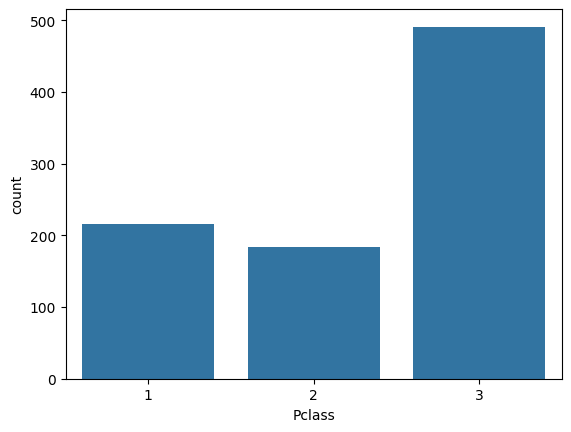

In [26]:
sns.countplot(x='Pclass',data=data)
plt.show()

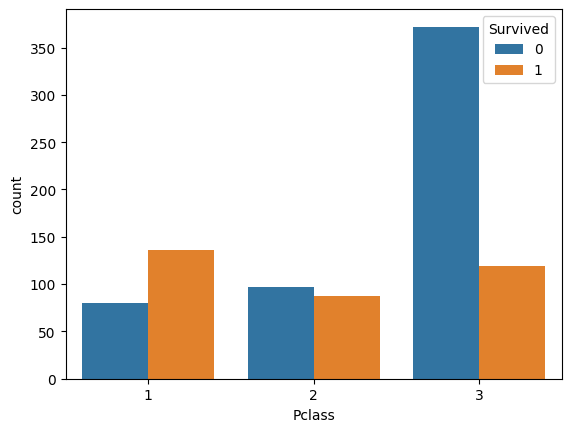

In [27]:
sns.countplot(x='Pclass',hue='Survived',data=data)
plt.show()

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  new_Age      825 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [30]:
data.drop('Cabin',axis=1,inplace=True)

In [31]:
data.drop('PassengerId',axis=1,inplace=True)

In [32]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'new_Age'],
      dtype='object')

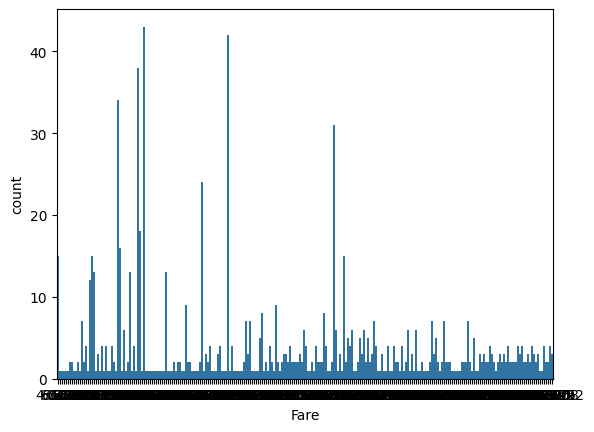

In [33]:
sns.countplot(x='Fare',data=data)
plt.show()

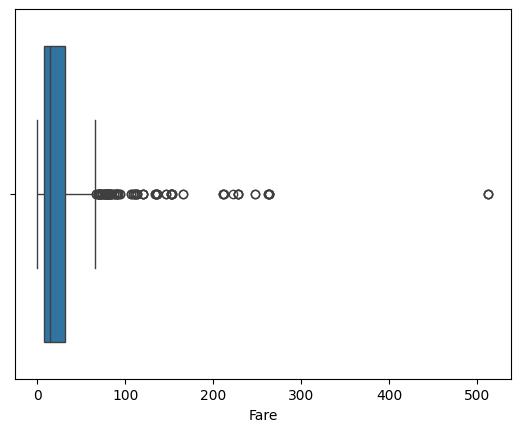

In [34]:
sns.boxplot(x='Fare',data=data)
plt.show()

In [35]:
fare_data = remove_outliers_iqr(data,'Fare')
fare_data['Fare'].describe()

count    775.000000
mean      17.822091
std       13.578085
min        0.000000
25%        7.895800
50%       13.000000
75%       26.000000
max       65.000000
Name: Fare, dtype: float64

In [36]:
fare_data1 = remove_outliers_zscore(data,'Fare')
fare_data1['Fare'].describe()

count    871.000000
mean      26.530170
std       29.351184
min        0.000000
25%        7.895800
50%       13.862500
75%       30.000000
max      164.866700
Name: Fare, dtype: float64

In [37]:
new_age_data = fare_data1['Fare']
new_age_data.describe()

count    871.000000
mean      26.530170
std       29.351184
min        0.000000
25%        7.895800
50%       13.862500
75%       30.000000
max      164.866700
Name: Fare, dtype: float64

In [38]:
data.drop('Fare',axis=1,inplace=True)
data['New_Fare'] = new_age_data
data.head(6)

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,new_Age,New_Fare
0,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,S,22.0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C,38.0,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,S,26.0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,S,35.0,53.1000
4,0,3,"Allen, Mr. William Henry",male,0,0,373450,S,35.0,8.0500
5,0,3,"Moran, Mr. James",male,0,0,330877,Q,28.0,8.4583


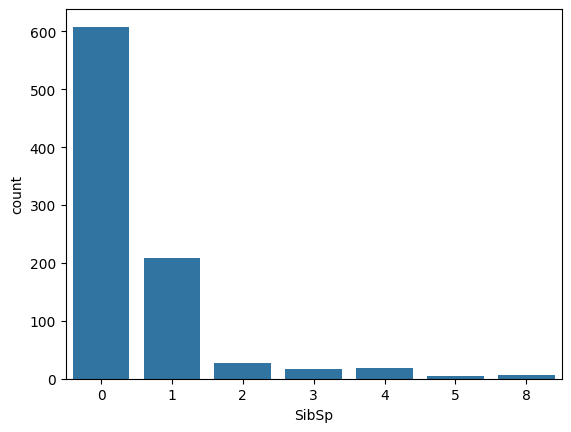

In [39]:
sns.countplot(x='SibSp',data=data)
plt.show()

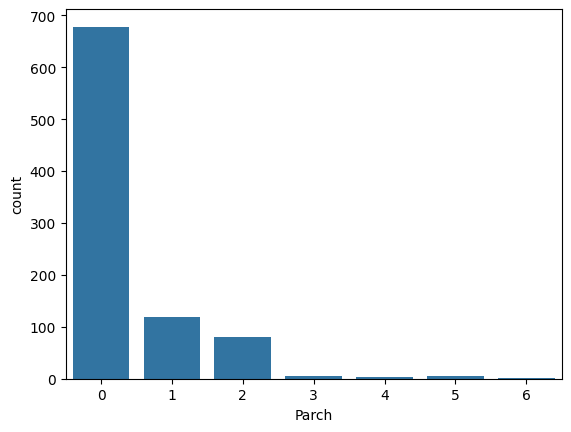

In [40]:
sns.countplot(x='Parch',data=data)
plt.show()

In [41]:
family_Data = data['SibSp'] + data['Parch']
family_Data.describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
dtype: float64

In [42]:
data['Family_data'] = family_Data
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket',
       'Embarked', 'new_Age', 'New_Fare', 'Family_data'],
      dtype='object')

In [43]:
data.head(5)

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,new_Age,New_Fare,Family_data
0,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,S,22.0,7.2500,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C,38.0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,S,26.0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,S,35.0,53.1000,1
4,0,3,"Allen, Mr. William Henry",male,0,0,373450,S,35.0,8.0500,0


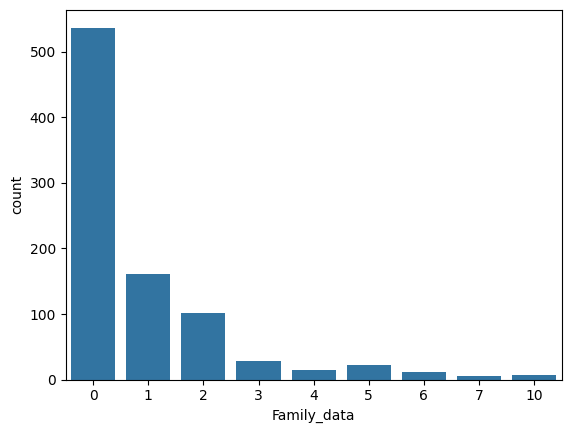

In [44]:
sns.countplot(x='Family_data',data=data)
plt.show()

In [45]:
data.drop('SibSp',axis=1,inplace=True)
data.drop('Parch',axis=1,inplace=True)

In [46]:
data.head(10)

,Survived,Pclass,Name,Sex,Ticket,Embarked,new_Age,New_Fare,Family_data
0,0,3,"Braund, Mr. Owen Harris",male,A/5 21171,S,22.0,7.2500,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C,38.0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S,26.0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S,35.0,53.1000,1
4,0,3,"Allen, Mr. William Henry",male,373450,S,35.0,8.0500,0
5,0,3,"Moran, Mr. James",male,330877,Q,28.0,8.4583,0
6,0,1,"McCarthy, Mr. Timothy J",male,17463,S,54.0,51.8625,0
7,0,3,"Palsson, Master. Gosta Leonard",male,349909,S,NaN,21.0750,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,347742,S,27.0,11.1333,2
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,237736,C,14.0,30.0708,1


* En son Family_data adında sibsp ve parch birleştirip yeni feature oluşturduk. verinin son hali yukarıda.
* Age kısmı aykırı verilerden arındı ve new_Age özelliği haline geldi
* fare kısmı aykırı verilerden arındı ve new_Fare özelliği haline geldi.

In [47]:
data.head(6)

,Survived,Pclass,Name,Sex,Ticket,Embarked,new_Age,New_Fare,Family_data
0,0,3,"Braund, Mr. Owen Harris",male,A/5 21171,S,22.0,7.2500,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C,38.0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S,26.0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S,35.0,53.1000,1
4,0,3,"Allen, Mr. William Henry",male,373450,S,35.0,8.0500,0
5,0,3,"Moran, Mr. James",male,330877,Q,28.0,8.4583,0


In [48]:
data['new_Age'].isnull().sum()

np.int64(66)

In [49]:
data['new_Age'].fillna(data['new_Age'].mean(),inplace=True)

/tmp/ipykernel_10271/3649328123.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['new_Age'].fillna(data['new_Age'].mean(),inplace=True)


In [50]:
data['new_Age'].isnull().sum()

np.int64(0)

In [51]:
data.head(14)

,Survived,Pclass,Name,Sex,Ticket,Embarked,new_Age,New_Fare,Family_data
0,0,3,"Braund, Mr. Owen Harris",male,A/5 21171,S,22.000000,7.2500,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C,38.000000,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S,26.000000,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S,35.000000,53.1000,1
4,0,3,"Allen, Mr. William Henry",male,373450,S,35.000000,8.0500,0
5,0,3,"Moran, Mr. James",male,330877,Q,28.000000,8.4583,0
6,0,1,"McCarthy, Mr. Timothy J",male,17463,S,54.000000,51.8625,0
7,0,3,"Palsson, Master. Gosta Leonard",male,349909,S,28.515152,21.0750,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,347742,S,27.000000,11.1333,2
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,237736,C,14.000000,30.0708,1


<Axes: xlabel='Family_data', ylabel='count'>

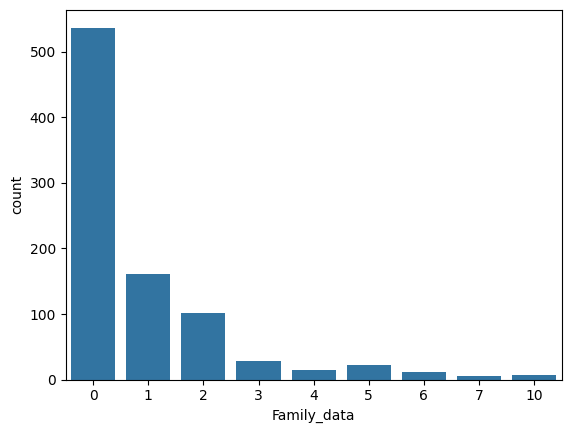

In [52]:
sns.countplot(x='Family_data',data=data)

In [53]:
data1 = data.copy()

In [54]:
# Yeni sütunları oluşturma ve değerleri atama
def family_category(size):
    if size == 0:
        return 'Alone'
    elif size == 1:
        return 'SmallFamily'
    elif size == 2:
        return 'MediumFamily'
    else:
        return 'LargeFamily'

data1['Alone'] = (data1['Family_data'] == 0).astype(int)
data1['SmallFamily'] = (data1['Family_data'] == 1).astype(int)
data1['MediumFamily'] = (data1['Family_data'] == 2).astype(int)
data1['LargeFamily'] = (data1['Family_data'] > 2).astype(int)
data1.head(10)

,Survived,Pclass,Name,Sex,Ticket,Embarked,new_Age,New_Fare,Family_data,Alone,SmallFamily,MediumFamily,LargeFamily
0,0,3,"Braund, Mr. Owen Harris",male,A/5 21171,S,22.000000,7.2500,1,0,1,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C,38.000000,71.2833,1,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S,26.000000,7.9250,0,1,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S,35.000000,53.1000,1,0,1,0,0
4,0,3,"Allen, Mr. William Henry",male,373450,S,35.000000,8.0500,0,1,0,0,0
5,0,3,"Moran, Mr. James",male,330877,Q,28.000000,8.4583,0,1,0,0,0
6,0,1,"McCarthy, Mr. Timothy J",male,17463,S,54.000000,51.8625,0,1,0,0,0
7,0,3,"Palsson, Master. Gosta Leonard",male,349909,S,28.515152,21.0750,4,0,0,0,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,347742,S,27.000000,11.1333,2,0,0,1,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,237736,C,14.000000,30.0708,1,0,1,0,0


In [55]:
data1.head(6)

,Survived,Pclass,Name,Sex,Ticket,Embarked,new_Age,New_Fare,Family_data,Alone,SmallFamily,MediumFamily,LargeFamily
0,0,3,"Braund, Mr. Owen Harris",male,A/5 21171,S,22.0,7.2500,1,0,1,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C,38.0,71.2833,1,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S,26.0,7.9250,0,1,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S,35.0,53.1000,1,0,1,0,0
4,0,3,"Allen, Mr. William Henry",male,373450,S,35.0,8.0500,0,1,0,0,0
5,0,3,"Moran, Mr. James",male,330877,Q,28.0,8.4583,0,1,0,0,0


In [56]:
last_data = data1.drop('Family_data',axis=1)

In [57]:
last_data.head(9)

,Survived,Pclass,Name,Sex,Ticket,Embarked,new_Age,New_Fare,Alone,SmallFamily,MediumFamily,LargeFamily
0,0,3,"Braund, Mr. Owen Harris",male,A/5 21171,S,22.000000,7.2500,0,1,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C,38.000000,71.2833,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S,26.000000,7.9250,1,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S,35.000000,53.1000,0,1,0,0
4,0,3,"Allen, Mr. William Henry",male,373450,S,35.000000,8.0500,1,0,0,0
5,0,3,"Moran, Mr. James",male,330877,Q,28.000000,8.4583,1,0,0,0
6,0,1,"McCarthy, Mr. Timothy J",male,17463,S,54.000000,51.8625,1,0,0,0
7,0,3,"Palsson, Master. Gosta Leonard",male,349909,S,28.515152,21.0750,0,0,0,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,347742,S,27.000000,11.1333,0,0,1,0


In [58]:
last_data['Sex'].head(10)

0      male
1    female
2    female
3    female
4      male
5      male
6      male
7      male
8    female
9    female
Name: Sex, dtype: object

In [59]:
pd.get_dummies(last_data['Sex'],dtype=float)

,female,male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


In [60]:
sex_data = pd.get_dummies(last_data['Sex'],dtype=float)
sex_data.head()

,female,male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [61]:
sex_data.head(5)

,female,male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [62]:
last_data.head(6)

,Survived,Pclass,Name,Sex,Ticket,Embarked,new_Age,New_Fare,Alone,SmallFamily,MediumFamily,LargeFamily
0,0,3,"Braund, Mr. Owen Harris",male,A/5 21171,S,22.0,7.2500,0,1,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C,38.0,71.2833,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S,26.0,7.9250,1,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S,35.0,53.1000,0,1,0,0
4,0,3,"Allen, Mr. William Henry",male,373450,S,35.0,8.0500,1,0,0,0
5,0,3,"Moran, Mr. James",male,330877,Q,28.0,8.4583,1,0,0,0


In [63]:
last_data = pd.concat([last_data,sex_data],axis=1)
last_data.head(5)

,Survived,Pclass,Name,Sex,Ticket,Embarked,new_Age,New_Fare,Alone,SmallFamily,MediumFamily,LargeFamily,female,male
0,0,3,"Braund, Mr. Owen Harris",male,A/5 21171,S,22.0,7.2500,0,1,0,0,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C,38.0,71.2833,0,1,0,0,1.0,0.0
2,1,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S,26.0,7.9250,1,0,0,0,1.0,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S,35.0,53.1000,0,1,0,0,1.0,0.0
4,0,3,"Allen, Mr. William Henry",male,373450,S,35.0,8.0500,1,0,0,0,0.0,1.0


In [64]:
last_data.drop('Sex',axis=1,inplace=True)
last_data.head(7)

,Survived,Pclass,Name,Ticket,Embarked,new_Age,New_Fare,Alone,SmallFamily,MediumFamily,LargeFamily,female,male
0,0,3,"Braund, Mr. Owen Harris",A/5 21171,S,22.0,7.2500,0,1,0,0,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C,38.0,71.2833,0,1,0,0,1.0,0.0
2,1,3,"Heikkinen, Miss. Laina",STON/O2. 3101282,S,26.0,7.9250,1,0,0,0,1.0,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,S,35.0,53.1000,0,1,0,0,1.0,0.0
4,0,3,"Allen, Mr. William Henry",373450,S,35.0,8.0500,1,0,0,0,0.0,1.0
5,0,3,"Moran, Mr. James",330877,Q,28.0,8.4583,1,0,0,0,0.0,1.0
6,0,1,"McCarthy, Mr. Timothy J",17463,S,54.0,51.8625,1,0,0,0,0.0,1.0


In [65]:
last_data.drop('Ticket',axis=1,inplace=True)

In [66]:
last_data.head(7)

,Survived,Pclass,Name,Embarked,new_Age,New_Fare,Alone,SmallFamily,MediumFamily,LargeFamily,female,male
0,0,3,"Braund, Mr. Owen Harris",S,22.0,7.2500,0,1,0,0,0.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C,38.0,71.2833,0,1,0,0,1.0,0.0
2,1,3,"Heikkinen, Miss. Laina",S,26.0,7.9250,1,0,0,0,1.0,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",S,35.0,53.1000,0,1,0,0,1.0,0.0
4,0,3,"Allen, Mr. William Henry",S,35.0,8.0500,1,0,0,0,0.0,1.0
5,0,3,"Moran, Mr. James",Q,28.0,8.4583,1,0,0,0,0.0,1.0
6,0,1,"McCarthy, Mr. Timothy J",S,54.0,51.8625,1,0,0,0,0.0,1.0


In [67]:
embarked_data = last_data['Embarked']
embarked_data.head(5)

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

<Axes: xlabel='Embarked', ylabel='count'>

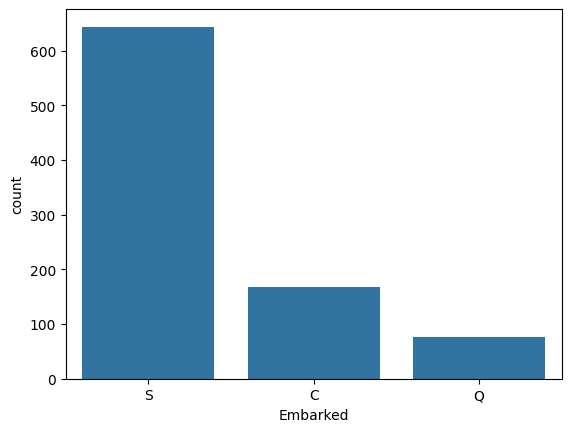

In [68]:
sns.countplot(x='Embarked',data=last_data)

In [69]:
embarked_data1 = pd.get_dummies(embarked_data,dtype=float)
embarked_data1.head(6)

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
5,0.0,1.0,0.0


In [70]:
embarked_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C       891 non-null    float64
 1   Q       891 non-null    float64
 2   S       891 non-null    float64
dtypes: float64(3)
memory usage: 21.0 KB


In [71]:
last_data = pd.concat([embarked_data1,last_data],axis=1)
last_data.head(10)

,C,Q,S,Survived,Pclass,Name,Embarked,new_Age,New_Fare,Alone,SmallFamily,MediumFamily,LargeFamily,female,male
0,0.0,0.0,1.0,0,3,"Braund, Mr. Owen Harris",S,22.000000,7.2500,0,1,0,0,0.0,1.0
1,1.0,0.0,0.0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C,38.000000,71.2833,0,1,0,0,1.0,0.0
2,0.0,0.0,1.0,1,3,"Heikkinen, Miss. Laina",S,26.000000,7.9250,1,0,0,0,1.0,0.0
3,0.0,0.0,1.0,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",S,35.000000,53.1000,0,1,0,0,1.0,0.0
4,0.0,0.0,1.0,0,3,"Allen, Mr. William Henry",S,35.000000,8.0500,1,0,0,0,0.0,1.0
5,0.0,1.0,0.0,0,3,"Moran, Mr. James",Q,28.000000,8.4583,1,0,0,0,0.0,1.0
6,0.0,0.0,1.0,0,1,"McCarthy, Mr. Timothy J",S,54.000000,51.8625,1,0,0,0,0.0,1.0
7,0.0,0.0,1.0,0,3,"Palsson, Master. Gosta Leonard",S,28.515152,21.0750,0,0,0,1,0.0,1.0
8,0.0,0.0,1.0,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",S,27.000000,11.1333,0,0,1,0,1.0,0.0
9,1.0,0.0,0.0,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",C,14.000000,30.0708,0,1,0,0,1.0,0.0


In [72]:
last_data.drop('Embarked',axis=1,inplace=True)
last_data.head(10)

,C,Q,S,Survived,Pclass,Name,new_Age,New_Fare,Alone,SmallFamily,MediumFamily,LargeFamily,female,male
0,0.0,0.0,1.0,0,3,"Braund, Mr. Owen Harris",22.000000,7.2500,0,1,0,0,0.0,1.0
1,1.0,0.0,0.0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,71.2833,0,1,0,0,1.0,0.0
2,0.0,0.0,1.0,1,3,"Heikkinen, Miss. Laina",26.000000,7.9250,1,0,0,0,1.0,0.0
3,0.0,0.0,1.0,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,53.1000,0,1,0,0,1.0,0.0
4,0.0,0.0,1.0,0,3,"Allen, Mr. William Henry",35.000000,8.0500,1,0,0,0,0.0,1.0
5,0.0,1.0,0.0,0,3,"Moran, Mr. James",28.000000,8.4583,1,0,0,0,0.0,1.0
6,0.0,0.0,1.0,0,1,"McCarthy, Mr. Timothy J",54.000000,51.8625,1,0,0,0,0.0,1.0
7,0.0,0.0,1.0,0,3,"Palsson, Master. Gosta Leonard",28.515152,21.0750,0,0,0,1,0.0,1.0
8,0.0,0.0,1.0,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,11.1333,0,0,1,0,1.0,0.0
9,1.0,0.0,0.0,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.000000,30.0708,0,1,0,0,1.0,0.0


In [73]:
last_data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [74]:
last_data['Title'] = [i.split(".")[0].split(",")[-1].strip() for i in last_data["Name"]]

In [75]:
last_data['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

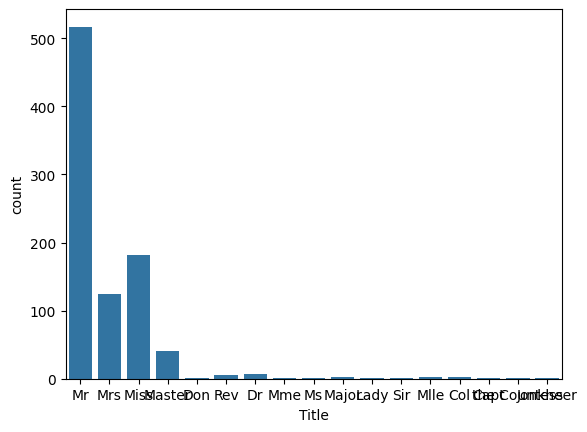

In [76]:
sns.countplot(x='Title',data=last_data)

In [77]:
last_data['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [78]:
last_data['Title'] = last_data['Title'].replace(['Dr','Rev','Col','Mlle','Major','Ms','Mne','Don','Lady','Sir','Capt','the Countess','Jonkheer','Mme','Master'],'Others')
last_data['Title'].value_counts()

Title
Mr        517
Miss      182
Mrs       125
Others     67
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

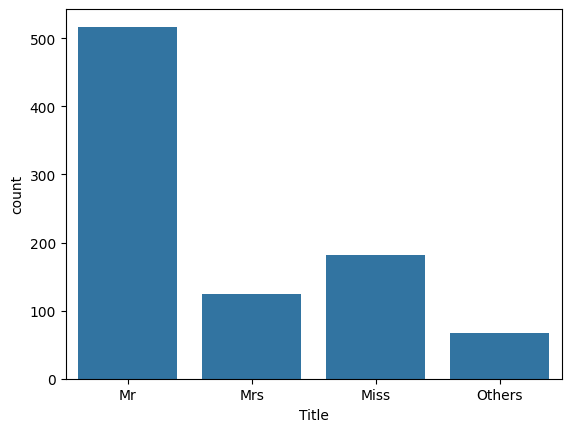

In [79]:
sns.countplot(x='Title',data=last_data)

In [80]:
title_name = pd.get_dummies(last_data['Title'],dtype=int)
title_name.head(6)

,Miss,Mr,Mrs,Others
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,0,1,0,0
5,0,1,0,0


In [81]:
last_data = pd.concat([title_name,last_data],axis=1)
last_data.head(6)

,Miss,Mr,Mrs,Others,C,Q,S,Survived,Pclass,Name,new_Age,New_Fare,Alone,SmallFamily,MediumFamily,LargeFamily,female,male,Title
0,0,1,0,0,0.0,0.0,1.0,0,3,"Braund, Mr. Owen Harris",22.0,7.2500,0,1,0,0,0.0,1.0,Mr
1,0,0,1,0,1.0,0.0,0.0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833,0,1,0,0,1.0,0.0,Mrs
2,1,0,0,0,0.0,0.0,1.0,1,3,"Heikkinen, Miss. Laina",26.0,7.9250,1,0,0,0,1.0,0.0,Miss
3,0,0,1,0,0.0,0.0,1.0,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000,0,1,0,0,1.0,0.0,Mrs
4,0,1,0,0,0.0,0.0,1.0,0,3,"Allen, Mr. William Henry",35.0,8.0500,1,0,0,0,0.0,1.0,Mr
5,0,1,0,0,0.0,1.0,0.0,0,3,"Moran, Mr. James",28.0,8.4583,1,0,0,0,0.0,1.0,Mr


In [82]:
last_data.drop('Name',axis=1,inplace=True)
last_data.head(6)

,Miss,Mr,Mrs,Others,C,Q,S,Survived,Pclass,new_Age,New_Fare,Alone,SmallFamily,MediumFamily,LargeFamily,female,male,Title
0,0,1,0,0,0.0,0.0,1.0,0,3,22.0,7.2500,0,1,0,0,0.0,1.0,Mr
1,0,0,1,0,1.0,0.0,0.0,1,1,38.0,71.2833,0,1,0,0,1.0,0.0,Mrs
2,1,0,0,0,0.0,0.0,1.0,1,3,26.0,7.9250,1,0,0,0,1.0,0.0,Miss
3,0,0,1,0,0.0,0.0,1.0,1,1,35.0,53.1000,0,1,0,0,1.0,0.0,Mrs
4,0,1,0,0,0.0,0.0,1.0,0,3,35.0,8.0500,1,0,0,0,0.0,1.0,Mr
5,0,1,0,0,0.0,1.0,0.0,0,3,28.0,8.4583,1,0,0,0,0.0,1.0,Mr


In [83]:
last_data.drop('Title',axis=1,inplace=True)
last_data.head(6)

,Miss,Mr,Mrs,Others,C,Q,S,Survived,Pclass,new_Age,New_Fare,Alone,SmallFamily,MediumFamily,LargeFamily,female,male
0,0,1,0,0,0.0,0.0,1.0,0,3,22.0,7.2500,0,1,0,0,0.0,1.0
1,0,0,1,0,1.0,0.0,0.0,1,1,38.0,71.2833,0,1,0,0,1.0,0.0
2,1,0,0,0,0.0,0.0,1.0,1,3,26.0,7.9250,1,0,0,0,1.0,0.0
3,0,0,1,0,0.0,0.0,1.0,1,1,35.0,53.1000,0,1,0,0,1.0,0.0
4,0,1,0,0,0.0,0.0,1.0,0,3,35.0,8.0500,1,0,0,0,0.0,1.0
5,0,1,0,0,0.0,1.0,0.0,0,3,28.0,8.4583,1,0,0,0,0.0,1.0


In [84]:
last_data.isnull().sum()

Miss             0
Mr               0
Mrs              0
Others           0
C                0
Q                0
S                0
Survived         0
Pclass           0
new_Age          0
New_Fare        20
Alone            0
SmallFamily      0
MediumFamily     0
LargeFamily      0
female           0
male             0
dtype: int64

In [85]:
last_data['New_Fare'].describe()

count    871.000000
mean      26.530170
std       29.351184
min        0.000000
25%        7.895800
50%       13.862500
75%       30.000000
max      164.866700
Name: New_Fare, dtype: float64

In [86]:
last_data['New_Fare'].fillna(last_data['New_Fare'].mean(),inplace=True)

/tmp/ipykernel_10271/1846447051.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  last_data['New_Fare'].fillna(last_data['New_Fare'].mean(),inplace=True)


In [87]:
last_data.isnull().sum()

Miss            0
Mr              0
Mrs             0
Others          0
C               0
Q               0
S               0
Survived        0
Pclass          0
new_Age         0
New_Fare        0
Alone           0
SmallFamily     0
MediumFamily    0
LargeFamily     0
female          0
male            0
dtype: int64

In [88]:
last_data.head(6)

,Miss,Mr,Mrs,Others,C,Q,S,Survived,Pclass,new_Age,New_Fare,Alone,SmallFamily,MediumFamily,LargeFamily,female,male
0,0,1,0,0,0.0,0.0,1.0,0,3,22.0,7.2500,0,1,0,0,0.0,1.0
1,0,0,1,0,1.0,0.0,0.0,1,1,38.0,71.2833,0,1,0,0,1.0,0.0
2,1,0,0,0,0.0,0.0,1.0,1,3,26.0,7.9250,1,0,0,0,1.0,0.0
3,0,0,1,0,0.0,0.0,1.0,1,1,35.0,53.1000,0,1,0,0,1.0,0.0
4,0,1,0,0,0.0,0.0,1.0,0,3,35.0,8.0500,1,0,0,0,0.0,1.0
5,0,1,0,0,0.0,1.0,0.0,0,3,28.0,8.4583,1,0,0,0,0.0,1.0


In [89]:
x = last_data.drop('Survived',axis=1)
y = last_data['Survived']

In [90]:
x.shape

(891, 16)

In [91]:
y.shape

(891,)

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(668, 16)
(668,)
(223, 16)
(223,)


In [93]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [94]:
tree.score(x_train,y_train)

0.9835329341317365

In [95]:
tree.score(x_test,y_test)

0.7847533632286996

In [96]:
last_data.head(6)

,Miss,Mr,Mrs,Others,C,Q,S,Survived,Pclass,new_Age,New_Fare,Alone,SmallFamily,MediumFamily,LargeFamily,female,male
0,0,1,0,0,0.0,0.0,1.0,0,3,22.0,7.2500,0,1,0,0,0.0,1.0
1,0,0,1,0,1.0,0.0,0.0,1,1,38.0,71.2833,0,1,0,0,1.0,0.0
2,1,0,0,0,0.0,0.0,1.0,1,3,26.0,7.9250,1,0,0,0,1.0,0.0
3,0,0,1,0,0.0,0.0,1.0,1,1,35.0,53.1000,0,1,0,0,1.0,0.0
4,0,1,0,0,0.0,0.0,1.0,0,3,35.0,8.0500,1,0,0,0,0.0,1.0
5,0,1,0,0,0.0,1.0,0.0,0,3,28.0,8.4583,1,0,0,0,0.0,1.0


In [97]:
x1 = last_data.drop('Pclass',axis=1)
y1 = last_data['Pclass']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(712, 16)
(712,)
(179, 16)
(179,)


In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [99]:
knn.score(x_train,y_train)

0.8862359550561798

In [100]:
knn.score(x_test,y_test)

0.888268156424581

In [101]:
import pandas as pd
last_data.to_csv('my_train.csv',index=False)